# Lecture notes

- See video for theoretical explanation of PCA

- In the spread of datapoints in a dimension, a new dimension is arbitrarily created which captures the highest variance in the new x-axis


## Measurable vs. Latent Features

Given the features of a house, what is its price? What technique will you use:

- decision tree classifier
- SVC
- linear regression?

Answer: linear regression

(Output is a continuous value)


Measurable
- square footage
- no of rooms
- school ranking
- neighborhood safety

Latent
- size
- neighborhood quality

What measureable features probe the latent feature size?
- square footage
- no of rooms

## Preserving Information

Large number of measureable features = use the most important ones 

Question: how best to condense 4 features (measurable) to 2, so that we can really get to the heart of the information?

Say for example, square footage and neighborhood safety.

What's the best feature selection tool? SelectKBest or SelectPercentile?
- since number of features is known, SelectKBest (total number of avaiable features not known, so SelectPercentile can't be used)

--> many features available, but hypothesis is a smaller number of features actually drive the patterns.
--> try making a composite feature that more directly probes the underlying phenomenon.

Composite feature -- principal component

Dimensionality reduction, unsupervised learning

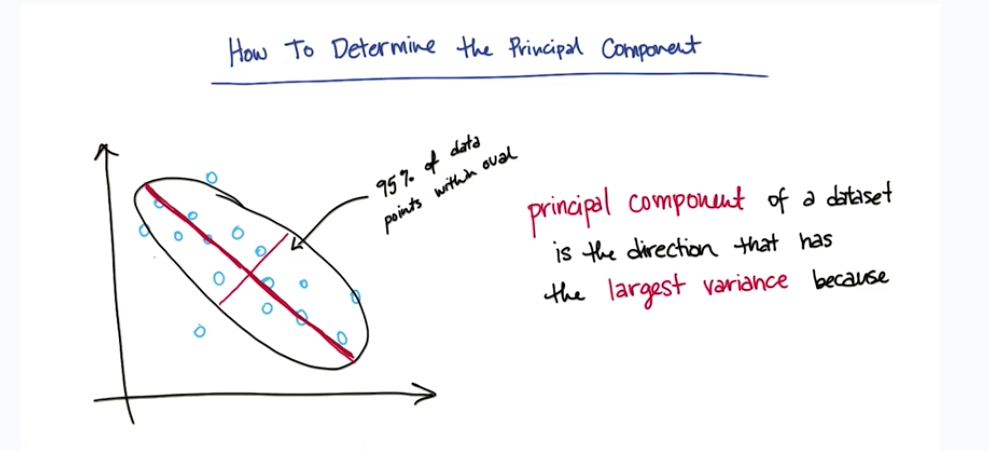

In [2]:
from IPython.display import Image
Image('principalcomponents.png')

-- retains the maximum amount of information from original data

## PCA as a general algorithm for feature transformation

```
           PCA                                     ML (regression, SVM, NB, etc)
features   ---->  latent features: 1st pc, 2nd pc ----------------------------------> prediction

```

## Maximum number of principal components

What's the maximum number of PCs allowed by sklearn if you have a dataset with 100 training points and 4 features for each point?

- 4

## Review

- systematized way to transform input features into principal components
- use principal componeets as new features
- PCs are directions in data that maximize variance (minimize information loss) when you project/compress down onto them
- more variance fo data along a PC, higher that PC is ranked
- most varaince / most information (first pc); secon pc - second most variance (perpendicular to 1st pc)
- max no of PCs = no. of input features

## PCA in sklearn

```
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)

# accessing attributes of object pca:
print pca.explained_variance_ratio_
first_pc = pca.components_[0]
second_pc = pca.components_[1]

transformed_data = pca.transform(data)

# plotting data
for ii, jj in zip(transformed_data, data):
    plt.scatter(first_pc[0]*ii[0], first_pc[1]*ii[0], color="r")
    plt.scatter(second_pc[0]*ii[1], second_pc[1]*ii[1], color="c")
    plt.scatter(jj[0], jj[1], color="b") # original data points
plt.xlabel("bonus")
plt.ylabel("long-term incentive")
plt.show()
```


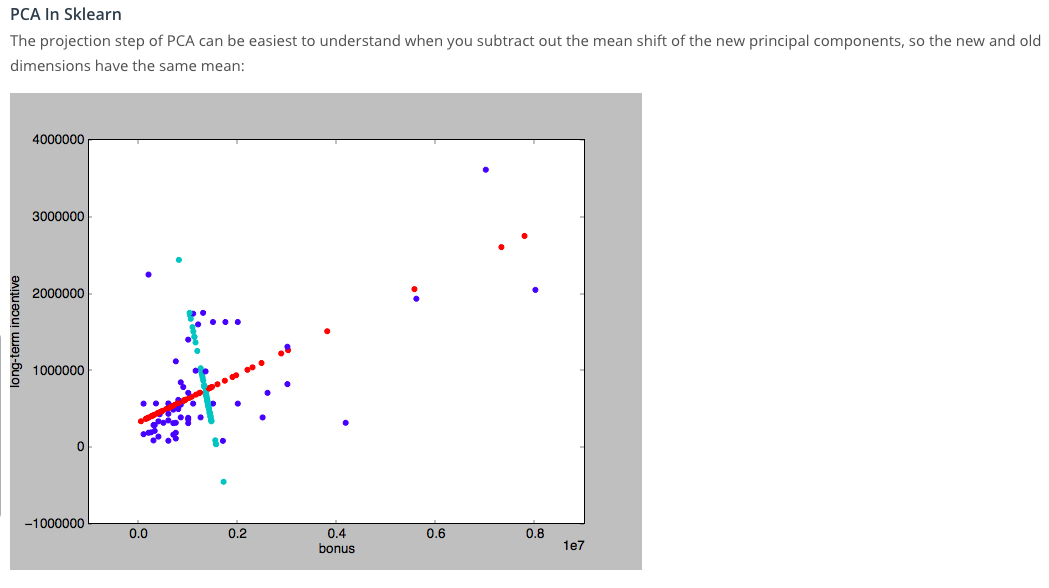

In [5]:
Image('pca_enronds.png')

## When to use PCA

- when latent features drive the patterns in data (ex. big shots at Enron)
- dimensionality reduction 
    - visualize high-dimensional data
    - reduce noise
    - make other algorithms (regression, classification) work better because of fewer points
    
                    Ex. eigenfaces in facial recognition

## PCA for Facial Recognition

PCA is good to do for facial recognition because:
- pictures of faces generally have high input dimensionality (many pixels)
- faces have general patterns that could be captured in smaller number of dimensions (2 eyes on top, mouth/chin on bottom, etc.)
